in this workbook I take you through an economic data analysis project with python pandas. We walk through the process of pulling down the data for different economic indicators, cleaning and joining the data. Using the Fred api I pull up to date data and compare, analyze and explore. 


In [136]:
!pip install fredapi > /dev/null

In [137]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import plotly.express as px
import time


In [138]:
import seaborn as sns
color_pal = sns.color_palette('Set2', n_colors=10)

In [139]:
import ssl
import json
import requests
import http
from urllib.request import urlopen

In [140]:
from fredapi import Fred

fred_key = 'f137d8ff562beabd25ebff3542845831'

In [141]:
fred = Fred(api_key=fred_key)

2. Search for economic data!

In [142]:
sp_search = fred.search('S&P', order_by='popularity')


In [143]:
sp_search.head()


,id,realtime_start,realtime_end,title,observation_start,observation_end,frequency,frequency_short,units,units_short,seasonal_adjustment,seasonal_adjustment_short,last_updated,popularity,notes
series id,,,,,,,,,,,,,,,
BAMLH0A0HYM2,BAMLH0A0HYM2,2023-04-16,2023-04-16,ICE BofA US High Yield Index Option-Adjusted S...,1996-12-31,2023-04-13,"Daily, Close",D,Percent,%,Not Seasonally Adjusted,NSA,2023-04-14 08:51:05-05:00,95,The ICE BofA Option-Adjusted Spreads (OASs) ar...
CSUSHPINSA,CSUSHPINSA,2023-04-16,2023-04-16,S&P/Case-Shiller U.S. National Home Price Index,1987-01-01,2023-01-01,Monthly,M,Index Jan 2000=100,Index Jan 2000=100,Not Seasonally Adjusted,NSA,2023-03-30 10:39:01-05:00,91,"For more information regarding the index, plea..."
SP500,SP500,2023-04-16,2023-04-16,S&P 500,2013-04-15,2023-04-14,"Daily, Close",D,Index,Index,Not Seasonally Adjusted,NSA,2023-04-14 19:10:49-05:00,84,The observations for the S&P 500 represent the...
BAMLH0A0HYM2EY,BAMLH0A0HYM2EY,2023-04-16,2023-04-16,ICE BofA US High Yield Index Effective Yield,1996-12-31,2023-04-13,"Daily, Close",D,Percent,%,Not Seasonally Adjusted,NSA,2023-04-14 08:51:09-05:00,83,This data represents the effective yield of th...
CSUSHPISA,CSUSHPISA,2023-04-16,2023-04-16,S&P/Case-Shiller U.S. National Home Price Index,1987-01-01,2023-01-01,Monthly,M,Index Jan 2000=100,Index Jan 2000=100,Seasonally Adjusted,SA,2023-03-30 10:39:01-05:00,81,"For more information regarding the index, plea..."


3. Pull Raw Data & Plot

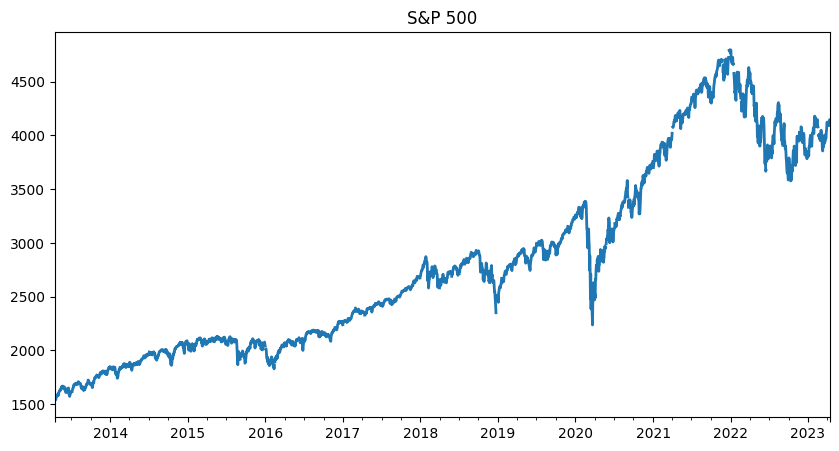

In [144]:
sp500 = fred.get_series(series_id='SP500')
sp500.plot(figsize=(10, 5), title='S&P 500', lw=2)
plt.show()

4. Pull and Join Multiple Data Series
I am comparing the differnt data in Uneployemn....  
monthly and for each state
I pulled up data to see what I can pull in. 

In [145]:
uemp_results = fred.search('unemployment')

In [146]:
uemp_results

,id,realtime_start,realtime_end,title,observation_start,observation_end,frequency,frequency_short,units,units_short,seasonal_adjustment,seasonal_adjustment_short,last_updated,popularity,notes
series id,,,,,,,,,,,,,,,
UNRATE,UNRATE,2023-04-16,2023-04-16,Unemployment Rate,1948-01-01,2023-03-01,Monthly,M,Percent,%,Seasonally Adjusted,SA,2023-04-07 07:44:02-05:00,94,The unemployment rate represents the number of...
UNRATENSA,UNRATENSA,2023-04-16,2023-04-16,Unemployment Rate,1948-01-01,2023-03-01,Monthly,M,Percent,%,Not Seasonally Adjusted,NSA,2023-04-07 07:43:02-05:00,58,The unemployment rate represents the number of...
NROU,NROU,2023-04-16,2023-04-16,Noncyclical Rate of Unemployment,1949-01-01,2033-10-01,Quarterly,Q,Percent,%,Not Seasonally Adjusted,NSA,2023-03-21 15:19:03-05:00,69,"Starting with the July, 2021 report: An Update..."
CCSA,CCSA,2023-04-16,2023-04-16,Continued Claims (Insured Unemployment),1967-01-07,2023-04-01,"Weekly, Ending Saturday",W,Number,Number,Seasonally Adjusted,SA,2023-04-13 07:48:05-05:00,74,"Continued claims, also referred to as insured ..."
UNEMPLOY,UNEMPLOY,2023-04-16,2023-04-16,Unemployment Level,1948-01-01,2023-03-01,Monthly,M,Thousands of Persons,Thous. of Persons,Seasonally Adjusted,SA,2023-04-07 07:44:04-05:00,69,The series comes from the 'Current Population ...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
LAUMT553154000000003A,LAUMT553154000000003A,2023-04-16,2023-04-16,"Unemployment Rate in Madison, WI (MSA)",1990-01-01,2021-01-01,Annual,A,Percent,%,Not Seasonally Adjusted,NSA,2022-04-27 10:15:48-05:00,1,None
LAUMT313654000000003A,LAUMT313654000000003A,2023-04-16,2023-04-16,"Unemployment Rate in Omaha-Council Bluffs, NE-...",1990-01-01,2021-01-01,Annual,A,Percent,%,Not Seasonally Adjusted,NSA,2022-04-27 11:08:48-05:00,1,None
LAUMT472894000000003A,LAUMT472894000000003A,2023-04-16,2023-04-16,"Unemployment Rate in Knoxville, TN (MSA)",1990-01-01,2021-01-01,Annual,A,Percent,%,Not Seasonally Adjusted,NSA,2022-04-27 11:07:48-05:00,1,None


I want to take seasonaly adjusted and monthly unemployemnt rate = UNRATE 

In [147]:
unrate = fred.get_series('UNRATE')

printing now unemployemnt rate seanally adjusted 

In [148]:
unrate

1948-01-01    3.4
1948-02-01    3.8
1948-03-01    4.0
1948-04-01    3.9
1948-05-01    3.5
             ... 
2022-11-01    3.6
2022-12-01    3.5
2023-01-01    3.4
2023-02-01    3.6
2023-03-01    3.5
Length: 903, dtype: float64

Quick Plot to see in visual 

<AxesSubplot: >

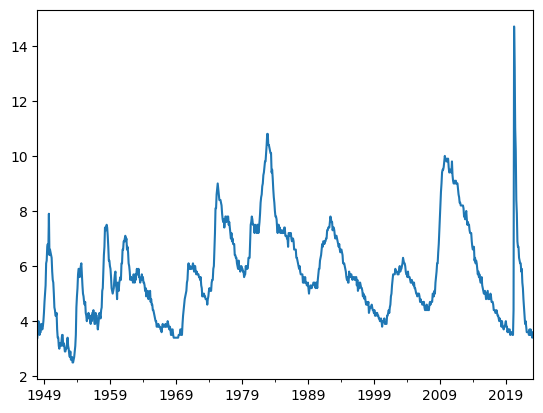

In [149]:
unrate.plot()

Looking now back at data for any specific states I can use. 

In [150]:
fred.search('unemployment state')

,id,realtime_start,realtime_end,title,observation_start,observation_end,frequency,frequency_short,units,units_short,seasonal_adjustment,seasonal_adjustment_short,last_updated,popularity,notes
series id,,,,,,,,,,,,,,,
UNRATE,UNRATE,2023-04-16,2023-04-16,Unemployment Rate,1948-01-01,2023-03-01,Monthly,M,Percent,%,Seasonally Adjusted,SA,2023-04-07 07:44:02-05:00,94,The unemployment rate represents the number of...
UNRATENSA,UNRATENSA,2023-04-16,2023-04-16,Unemployment Rate,1948-01-01,2023-03-01,Monthly,M,Percent,%,Not Seasonally Adjusted,NSA,2023-04-07 07:43:02-05:00,58,The unemployment rate represents the number of...
CCSA,CCSA,2023-04-16,2023-04-16,Continued Claims (Insured Unemployment),1967-01-07,2023-04-01,"Weekly, Ending Saturday",W,Number,Number,Seasonally Adjusted,SA,2023-04-13 07:48:05-05:00,74,"Continued claims, also referred to as insured ..."
CCNSA,CCNSA,2023-04-16,2023-04-16,Continued Claims (Insured Unemployment),1967-01-07,2023-04-01,"Weekly, Ending Saturday",W,Number,Number,Not Seasonally Adjusted,NSA,2023-04-13 07:48:10-05:00,34,"Continued claims, also referred to as insured ..."
UNEMPLOY,UNEMPLOY,2023-04-16,2023-04-16,Unemployment Level,1948-01-01,2023-03-01,Monthly,M,Thousands of Persons,Thous. of Persons,Seasonally Adjusted,SA,2023-04-07 07:44:04-05:00,69,The series comes from the 'Current Population ...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
MANC933URN,MANC933URN,2023-04-16,2023-04-16,"Unemployment Rate in Manchester, NH (NECTA)",1990-01-01,2023-02-01,Monthly,M,Percent,%,Not Seasonally Adjusted,NSA,2023-04-05 10:07:25-05:00,6,None
ILKANK0URN,ILKANK0URN,2023-04-16,2023-04-16,"Unemployment Rate in Kankakee County, IL",1990-01-01,2023-02-01,Monthly,M,Percent,%,Not Seasonally Adjusted,NSA,2023-04-05 10:11:04-05:00,6,These data come from the Current Population Su...
OHMARI0URN,OHMARI0URN,2023-04-16,2023-04-16,"Unemployment Rate in Marion County, OH",1990-01-01,2023-02-01,Monthly,M,Percent,%,Not Seasonally Adjusted,NSA,2023-04-05 10:22:09-05:00,6,These data come from the Current Population Su...


Going to filter down by frequency of monthly to start then I will brake down to a sub seriese after this df...  
unsing --filter-- is going to expect a tuple and suggest frequency, units, an dseasonal_adjustments..  I am choosing Frequency to show only frequency of monthly data.... 

In [151]:
unemp_df = fred.search('unemployment rate state', filter=('frequency','Monthly'))

In [152]:
unemp_df 

,id,realtime_start,realtime_end,title,observation_start,observation_end,frequency,frequency_short,units,units_short,seasonal_adjustment,seasonal_adjustment_short,last_updated,popularity,notes
series id,,,,,,,,,,,,,,,
UNRATE,UNRATE,2023-04-16,2023-04-16,Unemployment Rate,1948-01-01,2023-03-01,Monthly,M,Percent,%,Seasonally Adjusted,SA,2023-04-07 07:44:02-05:00,94,The unemployment rate represents the number of...
UNRATENSA,UNRATENSA,2023-04-16,2023-04-16,Unemployment Rate,1948-01-01,2023-03-01,Monthly,M,Percent,%,Not Seasonally Adjusted,NSA,2023-04-07 07:43:02-05:00,58,The unemployment rate represents the number of...
UNEMPLOY,UNEMPLOY,2023-04-16,2023-04-16,Unemployment Level,1948-01-01,2023-03-01,Monthly,M,Thousands of Persons,Thous. of Persons,Seasonally Adjusted,SA,2023-04-07 07:44:04-05:00,69,The series comes from the 'Current Population ...
LNS14000006,LNS14000006,2023-04-16,2023-04-16,Unemployment Rate - Black or African American,1972-01-01,2023-03-01,Monthly,M,Percent,%,Seasonally Adjusted,SA,2023-04-07 07:44:12-05:00,67,The series comes from the 'Current Population ...
U6RATE,U6RATE,2023-04-16,2023-04-16,"Total Unemployed, Plus All Persons Marginally ...",1994-01-01,2023-03-01,Monthly,M,Percent,%,Seasonally Adjusted,SA,2023-04-07 07:44:11-05:00,66,The series comes from the 'Current Population ...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
GAIN513UR,GAIN513UR,2023-04-16,2023-04-16,"Unemployment Rate in Gainesville, GA (MSA)",1990-01-01,2023-02-01,Monthly,M,Percent,%,Smoothed Seasonally Adjusted,SSA,2023-04-05 13:31:15-05:00,4,None
NJOCEA5URN,NJOCEA5URN,2023-04-16,2023-04-16,"Unemployment Rate in Ocean County, NJ",1990-01-01,2023-02-01,Monthly,M,Percent,%,Not Seasonally Adjusted,NSA,2023-04-05 10:09:22-05:00,4,These data come from the Current Population Su...
BEND441UR,BEND441UR,2023-04-16,2023-04-16,"Unemployment Rate in Bend-Redmond, OR (MSA)",1990-01-01,2023-02-01,Monthly,M,Percent,%,Smoothed Seasonally Adjusted,SSA,2023-04-05 13:31:08-05:00,4,None


Going to filter this down again and get the series for just a subset since title column has more then unemployement rate info. now filting the data from the title column.
 monthy dataframe with just seasonally adjusted values and percentage.. I will run a query on that unemployment data frame.
 looking in the seanally adjusted column I query and only pull when its seasonaly adjusted is true or as the value... and units are equal to Percent.    

In [153]:
unemp_df.query('seasonal_adjustment == "Seasonally Adjusted" and units == "Percent"')

,id,realtime_start,realtime_end,title,observation_start,observation_end,frequency,frequency_short,units,units_short,seasonal_adjustment,seasonal_adjustment_short,last_updated,popularity,notes
series id,,,,,,,,,,,,,,,
UNRATE,UNRATE,2023-04-16,2023-04-16,Unemployment Rate,1948-01-01,2023-03-01,Monthly,M,Percent,%,Seasonally Adjusted,SA,2023-04-07 07:44:02-05:00,94,The unemployment rate represents the number of...
LNS14000006,LNS14000006,2023-04-16,2023-04-16,Unemployment Rate - Black or African American,1972-01-01,2023-03-01,Monthly,M,Percent,%,Seasonally Adjusted,SA,2023-04-07 07:44:12-05:00,67,The series comes from the 'Current Population ...
U6RATE,U6RATE,2023-04-16,2023-04-16,"Total Unemployed, Plus All Persons Marginally ...",1994-01-01,2023-03-01,Monthly,M,Percent,%,Seasonally Adjusted,SA,2023-04-07 07:44:11-05:00,66,The series comes from the 'Current Population ...
CAUR,CAUR,2023-04-16,2023-04-16,Unemployment Rate in California,1976-01-01,2023-02-01,Monthly,M,Percent,%,Seasonally Adjusted,SA,2023-03-27 16:09:02-05:00,58,None
M0892AUSM156SNBR,M0892AUSM156SNBR,2023-04-16,2023-04-16,Unemployment Rate for United States,1929-04-01,1942-06-01,Monthly,M,Percent,%,Seasonally Adjusted,SA,2012-08-17 14:26:06-05:00,55,Series Is Presented Here As Three Variables--(...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
CNEWUR,CNEWUR,2023-04-16,2023-04-16,Unemployment Rate in New England Census Division,1976-01-01,2023-02-01,Monthly,M,Percent,%,Seasonally Adjusted,SA,2023-03-27 16:08:07-05:00,5,None
LBSSA11,LBSSA11,2023-04-16,2023-04-16,Labor Force Participation Rate for District Of...,1976-01-01,2023-02-01,Monthly,M,Percent,%,Seasonally Adjusted,SA,2023-03-24 09:01:15-05:00,5,A state's labor-force participation rate is th...
LNS14000048,LNS14000048,2023-04-16,2023-04-16,Unemployment Rate - 25 Yrs. & over,1948-01-01,2023-03-01,Monthly,M,Percent,%,Seasonally Adjusted,SA,2023-04-07 07:44:51-05:00,5,The series comes from the 'Current Population ...


saving data frame after that query 

In [154]:
unemp_df = unemp_df.query('seasonal_adjustment == "Seasonally Adjusted" and units == "Percent"')

Saving this data frame off was shaped down to 159 rows now.   

after saving this unemp_df going to search for only when it has unemployemnt rate in the title.. For me to do that is looking at the title column and applying a string filter on which ill call on next code chucnk....   


In [155]:
unemp_df['title']

series id
UNRATE                                              Unemployment Rate
LNS14000006             Unemployment Rate - Black or African American
U6RATE              Total Unemployed, Plus All Persons Marginally ...
CAUR                                  Unemployment Rate in California
M0892AUSM156SNBR                  Unemployment Rate for United States
                                          ...                        
CNEWUR               Unemployment Rate in New England Census Division
LBSSA11             Labor Force Participation Rate for District Of...
LNS14000048                        Unemployment Rate - 25 Yrs. & over
LNS14000093                            Unemployment Rate - 45-54 Yrs.
LNS14000015                     Unemployment Rate - 16-19 Yrs., White
Name: title, Length: 163, dtype: object

In [156]:
unemp_df['title'].str.contains('Unemployment Rate')

series id
UNRATE               True
LNS14000006          True
U6RATE              False
CAUR                 True
M0892AUSM156SNBR     True
                    ...  
CNEWUR               True
LBSSA11             False
LNS14000048          True
LNS14000093          True
LNS14000015          True
Name: title, Length: 163, dtype: bool

Next doing a locate where that is true ( unemployemnt rate ).shape

appling the string filter on the above code so it filters out all results that dont have Unelpoyemnt rate in the title

In [157]:
unemp_df.loc[unemp_df['title'].str.contains('Unemployment Rate')]

,id,realtime_start,realtime_end,title,observation_start,observation_end,frequency,frequency_short,units,units_short,seasonal_adjustment,seasonal_adjustment_short,last_updated,popularity,notes
series id,,,,,,,,,,,,,,,
UNRATE,UNRATE,2023-04-16,2023-04-16,Unemployment Rate,1948-01-01,2023-03-01,Monthly,M,Percent,%,Seasonally Adjusted,SA,2023-04-07 07:44:02-05:00,94,The unemployment rate represents the number of...
LNS14000006,LNS14000006,2023-04-16,2023-04-16,Unemployment Rate - Black or African American,1972-01-01,2023-03-01,Monthly,M,Percent,%,Seasonally Adjusted,SA,2023-04-07 07:44:12-05:00,67,The series comes from the 'Current Population ...
CAUR,CAUR,2023-04-16,2023-04-16,Unemployment Rate in California,1976-01-01,2023-02-01,Monthly,M,Percent,%,Seasonally Adjusted,SA,2023-03-27 16:09:02-05:00,58,None
M0892AUSM156SNBR,M0892AUSM156SNBR,2023-04-16,2023-04-16,Unemployment Rate for United States,1929-04-01,1942-06-01,Monthly,M,Percent,%,Seasonally Adjusted,SA,2012-08-17 14:26:06-05:00,55,Series Is Presented Here As Three Variables--(...
M0892BUSM156SNBR,M0892BUSM156SNBR,2023-04-16,2023-04-16,Unemployment Rate for United States,1940-01-01,1946-12-01,Monthly,M,Percent,%,Seasonally Adjusted,SA,2012-08-17 14:29:19-05:00,21,Series Is Presented Here As Three Variables--(...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
LNS14100000,LNS14100000,2023-04-16,2023-04-16,Unemployment Rate Full-Time Workers,1968-01-01,2023-03-01,Monthly,M,Percent,%,Seasonally Adjusted,SA,2023-04-07 07:44:51-05:00,6,The series comes from the 'Current Population ...
CNEWUR,CNEWUR,2023-04-16,2023-04-16,Unemployment Rate in New England Census Division,1976-01-01,2023-02-01,Monthly,M,Percent,%,Seasonally Adjusted,SA,2023-03-27 16:08:07-05:00,5,None
LNS14000048,LNS14000048,2023-04-16,2023-04-16,Unemployment Rate - 25 Yrs. & over,1948-01-01,2023-03-01,Monthly,M,Percent,%,Seasonally Adjusted,SA,2023-04-07 07:44:51-05:00,5,The series comes from the 'Current Population ...


starting the get_series fred command with for myid in this index pull this series using get_series for that each id.. 
save as results ans set a break ater the first loop to see output. 

In [158]:
for myid in unemp_df.index:
    results = fred.get_series(myid)
    break
  
  

After sub sets search from raw data.. Metadata df...   

Next part is actually go through each of thesa ids and pull the series data down..  ( the way I will do that is)
I will loop through each of them and then run get series fred command on the data.. 

I am calling index to see all differnt ids that I want pull out first

In [159]:
unemp_df.index

Index(['UNRATE', 'LNS14000006', 'U6RATE', 'CAUR', 'M0892AUSM156SNBR',
       'M0892BUSM156SNBR', 'TXUR', 'LNS14000002', 'U2RATE', 'NYUR',
       ...
       'LNS13008397', 'LNS13023570', 'LBSSA10', 'CSOUUR', 'LNS14100000',
       'CNEWUR', 'LBSSA11', 'LNS14000048', 'LNS14000093', 'LNS14000015'],
      dtype='object', name='series id', length=163)

checking length

In [160]:
len(unemp_df.index)

163

check the output is a series with the date index the values as unelmployemnt rate i will join thes eall up 

In [161]:
results

1948-01-01    3.4
1948-02-01    3.8
1948-03-01    4.0
1948-04-01    3.9
1948-05-01    3.5
             ... 
2022-11-01    3.6
2022-12-01    3.5
2023-01-01    3.4
2023-02-01    3.6
2023-03-01    3.5
Length: 903, dtype: float64

output is this series with theh dat index and the vaules of the unemployemnet rate.
going to want to join this all up  at a one point.. So will make it into a data frame.. running the to_frame() 
By default the column name is going to be a zero. 

By default the column name is going to be a zero. 

In [162]:
results.to_frame()

,0
1948-01-01,3.4
1948-02-01,3.8
1948-03-01,4.0
1948-04-01,3.9
1948-05-01,3.5
...,...
2022-11-01,3.6
2022-12-01,3.5
2023-01-01,3.4
2023-02-01,3.6


By default the column name is going to be a zero. 

output is this series with theh dat index and the vaules of the unemployemnet rate.
going to want to join this all up  at a one point.. So will make it into a data frame.. running the to_frame() 
By default the column name is going to be a zero. 

In [163]:
results.to_frame(name = myid)

,UNRATE
1948-01-01,3.4
1948-02-01,3.8
1948-03-01,4.0
1948-04-01,3.9
1948-05-01,3.5
...,...
2022-11-01,3.6
2022-12-01,3.5
2023-01-01,3.4
2023-02-01,3.6


saving df as results 

the jion up fropm abpove..   after lookig at all data . 
making a list to store all thes results in called all results

MAKING THIS LIST IN LOOP THEN WILL CALL A CONCAT THEM TOGETHER STACKED SIDE BY SIDE USING AXIS 1

In [164]:
all_results = []

for myid in unemp_df.index:
    results = fred.get_series(myid)
    results = results.to_frame(name=myid)
    all_results.append(results)
    time.sleep(0.1) # Don't request to fast and get blocked
uemp_results = pd.concat(all_results, axis=1).drop(['M0892BUSM156SNBR'],axis=1)

this is the list to check through.. each state has its own data frame 

In [165]:
all_results

[            UNRATE
 1948-01-01     3.4
 1948-02-01     3.8
 1948-03-01     4.0
 1948-04-01     3.9
 1948-05-01     3.5
 ...            ...
 2022-11-01     3.6
 2022-12-01     3.5
 2023-01-01     3.4
 2023-02-01     3.6
 2023-03-01     3.5
 
 [903 rows x 1 columns],
             LNS14000006
 1972-01-01         11.2
 1972-02-01         11.2
 1972-03-01         10.7
 1972-04-01          9.8
 1972-05-01         10.2
 ...                 ...
 2022-11-01          5.7
 2022-12-01          5.7
 2023-01-01          5.4
 2023-02-01          5.7
 2023-03-01          5.0
 
 [615 rows x 1 columns],
             U6RATE
 1994-01-01    11.7
 1994-02-01    11.4
 1994-03-01    11.5
 1994-04-01    11.3
 1994-05-01    10.9
 ...            ...
 2022-11-01     6.7
 2022-12-01     6.5
 2023-01-01     6.6
 2023-02-01     6.8
 2023-03-01     6.7
 
 [351 rows x 1 columns],
             CAUR
 1976-01-01   9.2
 1976-02-01   9.2
 1976-03-01   9.1
 1976-04-01   9.1
 1976-05-01   9.0
 ...          ...
 2022-10-01  

all results in thatlist and concat to make all stack side by side .   and no dates will have a null value

taken all results we have that are stored in list an concate them together and doing that by pd concat
all_results on axix =1 so that they are stacked side by side..   
some dont have the values for the same dates and thye will just be filled in with null values for those dates 

In [166]:
pd.concat(all_results,axis=1)

,UNRATE,LNS14000006,U6RATE,CAUR,M0892AUSM156SNBR,M0892BUSM156SNBR,TXUR,LNS14000002,U2RATE,NYUR,...,LNS13008397,LNS13023570,LBSSA10,CSOUUR,LNS14100000,CNEWUR,LBSSA11,LNS14000048,LNS14000093,LNS14000015
1929-04-01,NaN,NaN,NaN,NaN,0.69,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1929-05-01,NaN,NaN,NaN,NaN,1.65,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1929-06-01,NaN,NaN,NaN,NaN,2.06,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1929-07-01,NaN,NaN,NaN,NaN,0.79,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1929-08-01,NaN,NaN,NaN,NaN,0.04,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2022-11-01,3.6,5.7,6.7,4.1,NaN,NaN,3.8,3.6,1.7,4.1,...,37.6,9.4,59.9,3.4,3.5,3.6,70.3,3.0,2.7,9.9
2022-12-01,3.5,5.7,6.5,4.1,NaN,NaN,3.8,3.6,1.6,4.1,...,38.7,8.7,59.8,3.4,3.4,3.5,70.4,2.8,2.3,9.2
2023-01-01,3.4,5.4,6.6,4.2,NaN,NaN,3.9,3.3,1.5,4.2,...,33.9,9.2,59.8,3.3,3.4,3.5,70.5,2.8,2.3,9.5
2023-02-01,3.6,5.7,6.8,4.3,NaN,NaN,4.0,3.5,1.7,4.2,...,38.2,8.6,59.7,3.3,3.5,3.5,70.5,2.9,2.6,9.5


noticed a total null value column do will drop it. save as uemp_results

In [167]:
 uemp_results = pd.concat(all_results,axis=1).drop(['M0892BUSM156SNBR'],axis=1)


In [168]:
cols_to_drop = []
for i in uemp_results:
    if len(i) > 4:
        cols_to_drop.append(i)
uemp_results = uemp_results.drop(columns = cols_to_drop, axis=1)

In [169]:
uemp_results

,CAUR,TXUR,NYUR,FLUR,PAUR,OHUR,MIUR,ALUR,MNUR,KYUR,...,MEUR,MSUR,DCUR,NEUR,WYUR,DEUR,NHUR,IDUR,RIUR,VTUR
1929-04-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1929-05-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1929-06-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1929-07-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1929-08-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2022-11-01,4.1,3.8,4.1,2.7,4.4,4.1,4.4,2.6,3.0,3.9,...,3.1,4.1,4.2,2.7,3.9,4.7,2.9,2.8,3.3,3.1
2022-12-01,4.1,3.8,4.1,2.7,4.3,4.1,4.3,2.6,2.9,3.9,...,3.1,4.0,4.2,2.7,3.9,4.6,2.9,2.8,3.2,3.0
2023-01-01,4.2,3.9,4.2,2.6,4.3,4.0,4.3,2.6,2.9,3.9,...,2.9,3.9,4.5,2.5,3.9,4.6,2.8,2.7,3.1,2.9
2023-02-01,4.3,4.0,4.2,2.6,4.4,3.9,4.3,2.5,3.0,3.9,...,2.8,3.7,4.7,2.3,3.8,4.6,2.7,2.6,3.1,2.8


In [170]:
uemp_states = uemp_results

chunk below will tell how many unit missing values for each date and then plot below to check to see if drop NA is ok.. 

In [171]:
uemp_states.isna().sum(axis=1)

1929-04-01    52
1929-05-01    52
1929-06-01    52
1929-07-01    52
1929-08-01    52
              ..
2022-11-01     0
2022-12-01     0
2023-01-01     0
2023-02-01     0
2023-03-01    52
Length: 1116, dtype: int64

this plot now will show dates prior to when they started provided monthly uneployment rates for staes 

<AxesSubplot: >

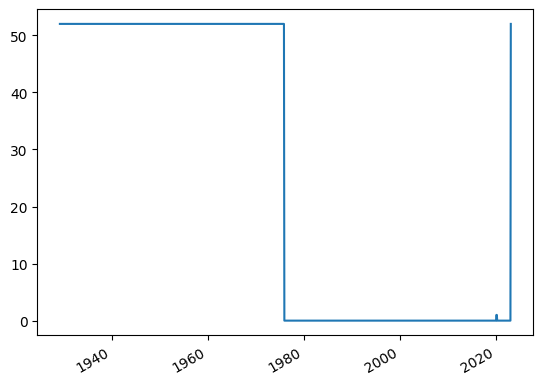

In [172]:
uemp_states.isna().sum(axis=1).plot()

this is dates prior to when they started provided monthly uneployment rates for staes 

In [173]:
uemp_states = uemp_results.copy()  #.drop('UNRATE', axis=1)
uemp_states = uemp_states.dropna()
id_to_state = unemp_df['title'].str.replace('Unemployment Rate in ','').to_dict()
uemp_states.columns = [id_to_state[c] for c in uemp_states.columns]

check the type and all in list.. it pull for all the different unemployemnet rate features that I wanted to pull, now they are in a list and each of the 
values in the list has one data frame with each of the different  Id states, ect..    if you input a number that will call result of each id value.. 
they have there own data frame ....  

using PLoty express the plots are interactive.  can double click filter differnet states and show mulitple states next to each other.. 

In [174]:
##plot STATES OF UNEMPLOEMNT RATES 

px.line(uemp_states)

plot of states unelmpoyment rate

In [175]:
uemp_states = uemp_results.copy()  #.drop('UNRATE', axis=1)
uemp_states = uemp_states.dropna()
id_to_state = unemp_df['title'].str.replace('Unemployment Rate in ','').to_dict()
uemp_states.columns = [id_to_state[c] for c in uemp_states.columns]

Pull February 2023 Unemployment Rate Per State have sort values acsending...   

In [176]:
uemp_states.loc[uemp_states.index == '2023-02-01'].T.sort_values('2023-02-01')

,2023-02-01
North Dakota,2.1
South Dakota,2.1
Nebraska,2.3
Utah,2.4
Montana,2.4
Alabama,2.5
Idaho,2.6
Florida,2.6
Missouri,2.6
New Hampshire,2.7


Before going into the bar plot If need to link and switch fred index id name to actual state name you can do 
------ take title where the state is named and make new column  called state name by doing a string on this column then replace(replace out where it is uneployement rate)
and just use a '' emnpty space..   
unemp_df['title'].str.replace('Unemployment Rate in', '')then
unemp_df['title'].str.replace('Unemployment Rate in', '').to.dict( id to state name) next
id_to State = unemp_df['title'].str.replace('Unemployment Rate in', '').to.dict()( mapping id to state name) 
taken the mapping dictionary to leverage it to rename the columns in the data fram above Uemp_states.  first take the columns and use something called ##list comprehension..
go through each values in the columns and apply the mapping to it. c for c......

id_to_state = unemp_df['title'].str.replace('Unemployment Rate in', '').to_dict()
c for c will give the list then i added the df and cloumns now the call will be states as coulmn names 

uemp_states.columns = [c for c in uemp_states.columns]  the df will print out with states as columns names 
then do all bar plots with new data as uemp_states





In [177]:
#all id matched up with state names (unrate link to Unemployemnt Rate) looking back at the metadata up top page.. 

unemp_df['title'].str.replace('Unemployment Rate in', '')

series id
UNRATE                                              Unemployment Rate
LNS14000006             Unemployment Rate - Black or African American
U6RATE              Total Unemployed, Plus All Persons Marginally ...
CAUR                                                       California
M0892AUSM156SNBR                  Unemployment Rate for United States
                                          ...                        
CNEWUR                                    New England Census Division
LBSSA11             Labor Force Participation Rate for District Of...
LNS14000048                        Unemployment Rate - 25 Yrs. & over
LNS14000093                            Unemployment Rate - 45-54 Yrs.
LNS14000015                     Unemployment Rate - 16-19 Yrs., White
Name: title, Length: 163, dtype: object

In [178]:
#make into a dictiony to map ids names to rate names  

unemp_df['title'].str.replace('Unemployment Rate in', '').to_dict()

{'UNRATE': 'Unemployment Rate',
 'LNS14000006': 'Unemployment Rate - Black or African American',
 'U6RATE': 'Total Unemployed, Plus All Persons Marginally Attached to the Labor Force, Plus Total Employed Part Time for Economic Reasons, as a Percent of the Civilian Labor Force Plus All Persons Marginally Attached to the Labor Force (U-6)',
 'CAUR': ' California',
 'M0892AUSM156SNBR': 'Unemployment Rate for United States',
 'M0892BUSM156SNBR': 'Unemployment Rate for United States',
 'TXUR': ' Texas',
 'LNS14000002': 'Unemployment Rate - Women',
 'U2RATE': 'Unemployment Rate - Job Losers (U-2)',
 'NYUR': ' New York',
 'FLUR': ' Florida',
 'LNS14000031': 'Unemployment Rate - 20 Yrs. & over, Black or African American Men',
 'LNS14000024': 'Unemployment Rate - 20 Yrs. & over',
 'LNS14000009': 'Unemployment Rate - Hispanic or Latino',
 'LNS14027662': "Unemployment Rate - Bachelor's Degree and Higher, 25 Yrs. & over",
 'LNS14027660': 'Unemployment Rate - High School Graduates, No College, 25 Y

In [179]:
# taken the mapping dictionary and to use leverage it to rename the columns in the data fram above Uemp_states.  first take the columns and use something called list comprehension..
## go through each values in the columns and apply the mapping to it. c for c......

id_to_state = unemp_df['title'].str.replace('Unemployment Rate in', '').to_dict()

In [180]:
#c for c will give the list "MAPPING" then i added the df and cloumns now the call will be states as column names 
#c for c in uemp_states.columns === gives you state id 
#id_to_state[c]for c in uemp_states.columns]====gives you state names from the columns 


uemp_states.columns = [c for c in uemp_states.columns]

now have the state bname as the coloumns us ethis for the new plt to read better on the plot..  instead of the state id codes names they give.. 

In [181]:
uemp_states

,California,Texas,New York,Florida,Pennsylvania,Ohio,Michigan,Alabama,Minnesota,Kentucky,...,Maine,Mississippi,the District of Columbia,Nebraska,Wyoming,Delaware,New Hampshire,Idaho,Rhode Island,Vermont
1976-01-01,9.2,5.8,10.3,9.7,8.0,8.1,9.9,6.6,6.0,5.6,...,8.7,6.7,8.7,3.3,4.1,8.0,6.5,5.6,7.8,8.6
1976-02-01,9.2,5.8,10.3,9.7,8.1,8.1,9.9,6.6,6.0,5.6,...,8.7,6.7,8.7,3.3,4.1,8.0,6.5,5.6,7.8,8.6
1976-03-01,9.1,5.9,10.2,9.6,8.1,8.1,9.9,6.6,5.9,5.6,...,8.6,6.6,8.6,3.3,4.1,8.0,6.5,5.6,7.7,8.6
1976-04-01,9.1,5.9,10.2,9.5,8.1,8.0,9.8,6.5,5.8,5.6,...,8.6,6.4,8.5,3.2,4.0,8.1,6.5,5.6,7.7,8.6
1976-05-01,9.0,5.9,10.1,9.3,8.1,7.8,9.6,6.4,5.7,5.5,...,8.5,6.3,8.4,3.1,3.9,8.3,6.5,5.6,7.7,8.5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2022-10-01,4.1,3.9,4.2,2.7,4.4,4.2,4.4,2.6,3.0,4.0,...,3.1,4.1,4.2,2.7,3.9,4.7,2.9,2.8,3.4,3.1
2022-11-01,4.1,3.8,4.1,2.7,4.4,4.1,4.4,2.6,3.0,3.9,...,3.1,4.1,4.2,2.7,3.9,4.7,2.9,2.8,3.3,3.1
2022-12-01,4.1,3.8,4.1,2.7,4.3,4.1,4.3,2.6,2.9,3.9,...,3.1,4.0,4.2,2.7,3.9,4.6,2.9,2.8,3.2,3.0
2023-01-01,4.2,3.9,4.2,2.6,4.3,4.0,4.3,2.6,2.9,3.9,...,2.9,3.9,4.5,2.5,3.9,4.6,2.8,2.7,3.1,2.9


Now using this new data frame redu the plots with all state names....... uing uemp_states data for the plots.. 

Bar Plot 

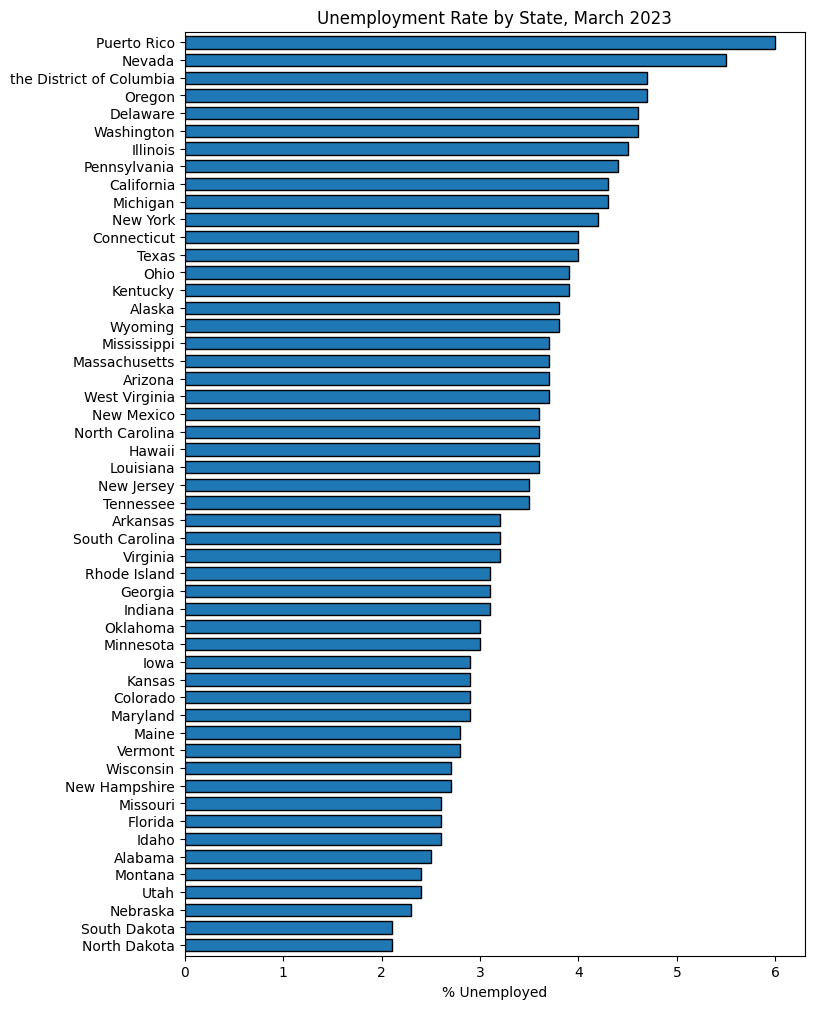

In [182]:
ax = uemp_states.loc[uemp_states.index == '2023-02-01'].T \
    .sort_values('2023-02-01') \
    .plot(kind='barh', figsize=(8, 12), width=0.7, edgecolor='black',
          title='Unemployment Rate by State, March 2023')
ax.legend().remove()
ax.set_xlabel('% Unemployed')
plt.show()

Pull Participation Rate
a indicator of people who are participating in tbe job marke..  
so now I pull Pull Participation Rate 
call it part_df call fred search for the particpation data.. 
then query what i want..   I Wwant the seasonal adjustment column to show seasonally adjusted with units column equal to perecent.. 

In [183]:
part_df = fred.search('Participation Rate states', filter=('frequency','Monthly'))
part_df = part_df.query('seasonal_adjustment == "Seasonally Adjusted" and units == "Percent"')

In [184]:
part_df

,id,realtime_start,realtime_end,title,observation_start,observation_end,frequency,frequency_short,units,units_short,seasonal_adjustment,seasonal_adjustment_short,last_updated,popularity,notes
series id,,,,,,,,,,,,,,,
CIVPART,CIVPART,2023-04-16,2023-04-16,Labor Force Participation Rate,1948-01-01,2023-03-01,Monthly,M,Percent,%,Seasonally Adjusted,SA,2023-04-07 07:44:02-05:00,85,The series comes from the 'Current Population ...
LNS11300060,LNS11300060,2023-04-16,2023-04-16,Labor Force Participation Rate - 25-54 Yrs.,1948-01-01,2023-03-01,Monthly,M,Percent,%,Seasonally Adjusted,SA,2023-04-07 07:44:07-05:00,66,The series comes from the 'Current Population ...
LNS11300002,LNS11300002,2023-04-16,2023-04-16,Labor Force Participation Rate - Women,1948-01-01,2023-03-01,Monthly,M,Percent,%,Seasonally Adjusted,SA,2023-04-07 07:44:07-05:00,66,To obtain estimates of women worker employment...
LNS11300001,LNS11300001,2023-04-16,2023-04-16,Labor Force Participation Rate - Men,1948-01-01,2023-03-01,Monthly,M,Percent,%,Seasonally Adjusted,SA,2023-04-07 07:44:13-05:00,60,The series comes from the 'Current Population ...
LNS11324230,LNS11324230,2023-04-16,2023-04-16,Labor Force Participation Rate - 55 Yrs. & over,1948-01-01,2023-03-01,Monthly,M,Percent,%,Seasonally Adjusted,SA,2023-04-07 07:44:14-05:00,52,The series comes from the 'Current Population ...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
LRACTTMAUSM156S,LRACTTMAUSM156S,2023-04-16,2023-04-16,Activity Rate: Aged 15 and Over: Males for the...,1960-01-01,2023-01-01,Monthly,M,Percent,%,Seasonally Adjusted,SA,2023-02-14 11:39:02-06:00,1,OECD descriptor ID: LRACTTMA OECD unit ID: STS...
LRINTTMAUSM156S,LRINTTMAUSM156S,2023-04-16,2023-04-16,Inactivity Rate: Aged 15 and Over: Males for t...,1975-01-01,2023-01-01,Monthly,M,Percent,%,Seasonally Adjusted,SA,2023-02-14 11:40:44-06:00,1,OECD descriptor ID: LRINTTMA OECD unit ID: STS...
LRINTTFEUSM156S,LRINTTFEUSM156S,2023-04-16,2023-04-16,Inactivity Rate: Aged 15 and Over: Females for...,1975-01-01,2023-01-01,Monthly,M,Percent,%,Seasonally Adjusted,SA,2023-02-14 11:40:44-06:00,1,OECD descriptor ID: LRINTTFE OECD unit ID: STS...


continue mapping like above and make a dictionary. 

In [185]:
part_df['title'].str.replace('Labor Force Participation Rate for ','').to_dict()

{'CIVPART': 'Labor Force Participation Rate',
 'LNS11300060': 'Labor Force Participation Rate - 25-54 Yrs.',
 'LNS11300002': 'Labor Force Participation Rate - Women',
 'LNS11300001': 'Labor Force Participation Rate - Men',
 'LNS11324230': 'Labor Force Participation Rate - 55 Yrs. & over',
 'LNS11300012': 'Labor Force Participation Rate - 16-19 Yrs.',
 'LNS11300006': 'Labor Force Participation Rate - Black or African American',
 'LNS11300036': 'Labor Force Participation Rate - 20-24 Yrs.',
 'LRAC25MAUSM156S': 'Activity Rate: Aged 25-54: Males for the United States',
 'LNS11327662': "Labor Force Participation Rate - Bachelor's Degree and Higher, 25 Yrs. & over",
 'LBSSA06': 'California',
 'LBSSA27': 'Minnesota',
 'LNS11300028': 'Labor Force Participation Rate - 20 Yrs. & over, White Men',
 'LRAC25FEUSM156S': 'Activity Rate: Aged 25-54: Females for the United States',
 'LNS11300031': 'Labor Force Participation Rate - 20 Yrs. & over, Black or African American Men',
 'LBSSA55': 'Wisconsin',

start to replace and mapping take out 'Labor Force Participation Rate for' doing dictionary label as part_d_to_state
doing the loop through and combine all of the results silair to the Unemployemnet rate above. 

In [190]:
part_id_to_state = part_df['title'].str.replace('Labor Force Participation Rate for ','').to_dict()

all_results = []

for myid in part_df.index:
    results = fred.get_series(myid)
    results = results.to_frame(name=myid)
    all_results.append(results)
    part_states = pd.concat(all_results, axis=1)
    part_states.columns= [part_id_to_state[c] for c in part_states.columns]

In [191]:
part_states

,Labor Force Participation Rate,Labor Force Participation Rate - 25-54 Yrs.,Labor Force Participation Rate - Women,Labor Force Participation Rate - Men,Labor Force Participation Rate - 55 Yrs. & over,Labor Force Participation Rate - 16-19 Yrs.,Labor Force Participation Rate - Black or African American,Labor Force Participation Rate - 20-24 Yrs.,Activity Rate: Aged 25-54: Males for the United States,"Labor Force Participation Rate - Bachelor's Degree and Higher, 25 Yrs. & over",...,Activity Rate: Aged 15-74: All Persons for the United States,Inactivity Rate: Aged 55-64: All Persons for the United States,Inactivity Rate: Aged 15-74: All Persons for the United States,Inactivity Rate: Aged 15-24: All Persons for the United States,Activity Rate: Aged 15 and Over: Females for the United States,Activity Rate: Aged 15 and Over: Males for the United States,Inactivity Rate: Aged 15 and Over: Males for the United States,Inactivity Rate: Aged 15 and Over: Females for the United States,Activity Rate: Aged 15 and Over: All Persons for the United States,Inactivity Rate: Aged 15 and Over: All Persons for the United States
1948-01-01,58.6,64.2,32.0,86.7,43.0,53.2,NaN,64.4,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1948-02-01,58.9,64.6,32.4,87.0,43.3,53.7,NaN,64.9,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1948-03-01,58.5,64.3,32.1,86.3,43.0,54.1,NaN,63.3,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1948-04-01,59.0,64.8,33.0,86.6,43.4,54.2,NaN,63.7,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1948-05-01,58.3,64.3,32.0,86.1,43.2,50.9,NaN,63.7,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2022-11-01,62.2,82.3,56.5,68.1,38.6,37.8,62.3,70.6,88.4,72.5,...,67.351055,34.944574,32.648945,44.323363,56.5,68.1,31.933913,43.463621,62.2,37.845853
2022-12-01,62.3,82.4,56.8,68.1,38.8,37.0,62.4,71.3,88.5,72.7,...,67.472120,34.471129,32.527880,44.339548,56.8,68.1,31.914762,43.221350,62.3,37.712012
2023-01-01,62.4,82.7,57.0,67.9,38.7,37.2,62.9,71.5,88.5,72.7,...,67.621562,34.365438,32.378438,43.504094,57.0,67.9,32.050247,43.000669,62.4,37.648235
2023-02-01,62.5,83.1,57.2,68.0,38.4,37.5,63.4,72.0,NaN,72.3,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


grabbing code from above to do same mapping as before with unemployemnt.. 
dictionary and then the all results to loop through

In [195]:
uemp_states = uemp_states.rename(columns={'the District of Columbia':'District Of Columbia'})

Ploting out combination of Unemployement rate Vs Particapation rate. Using 50 states.I exculded Dictrict of Columbia and Puerto Rico..  Creating  sub plots using axs and iterate over the states.   Multiple axs to plot to loop through.  
doing a 10 by 5 format then all equal figsize 30  and sharingx true cause same scale 
 using axs.flatten() is a method used on a NumPy array to convert it from a multi-dimensional array (such as a 2D array) to a one-dimensional array.
 After calling axs.flatten(), you can iterate over the subplots using a single index i (as shown in the provided code) instead of using nested loops with row and column indices.


taken i for the index location starting form 0 to increment each time from the axs 1=0, axs[i], i += 1, in the code chunk 



using flatten()The purpose of doing this is to simplify the iteration over the subplots in the subsequent loop. With a flattened array, you can access each subplot using a single index, rather than having to deal with two indices (one for the row and another for the column). This makes the code easier to read and understand.


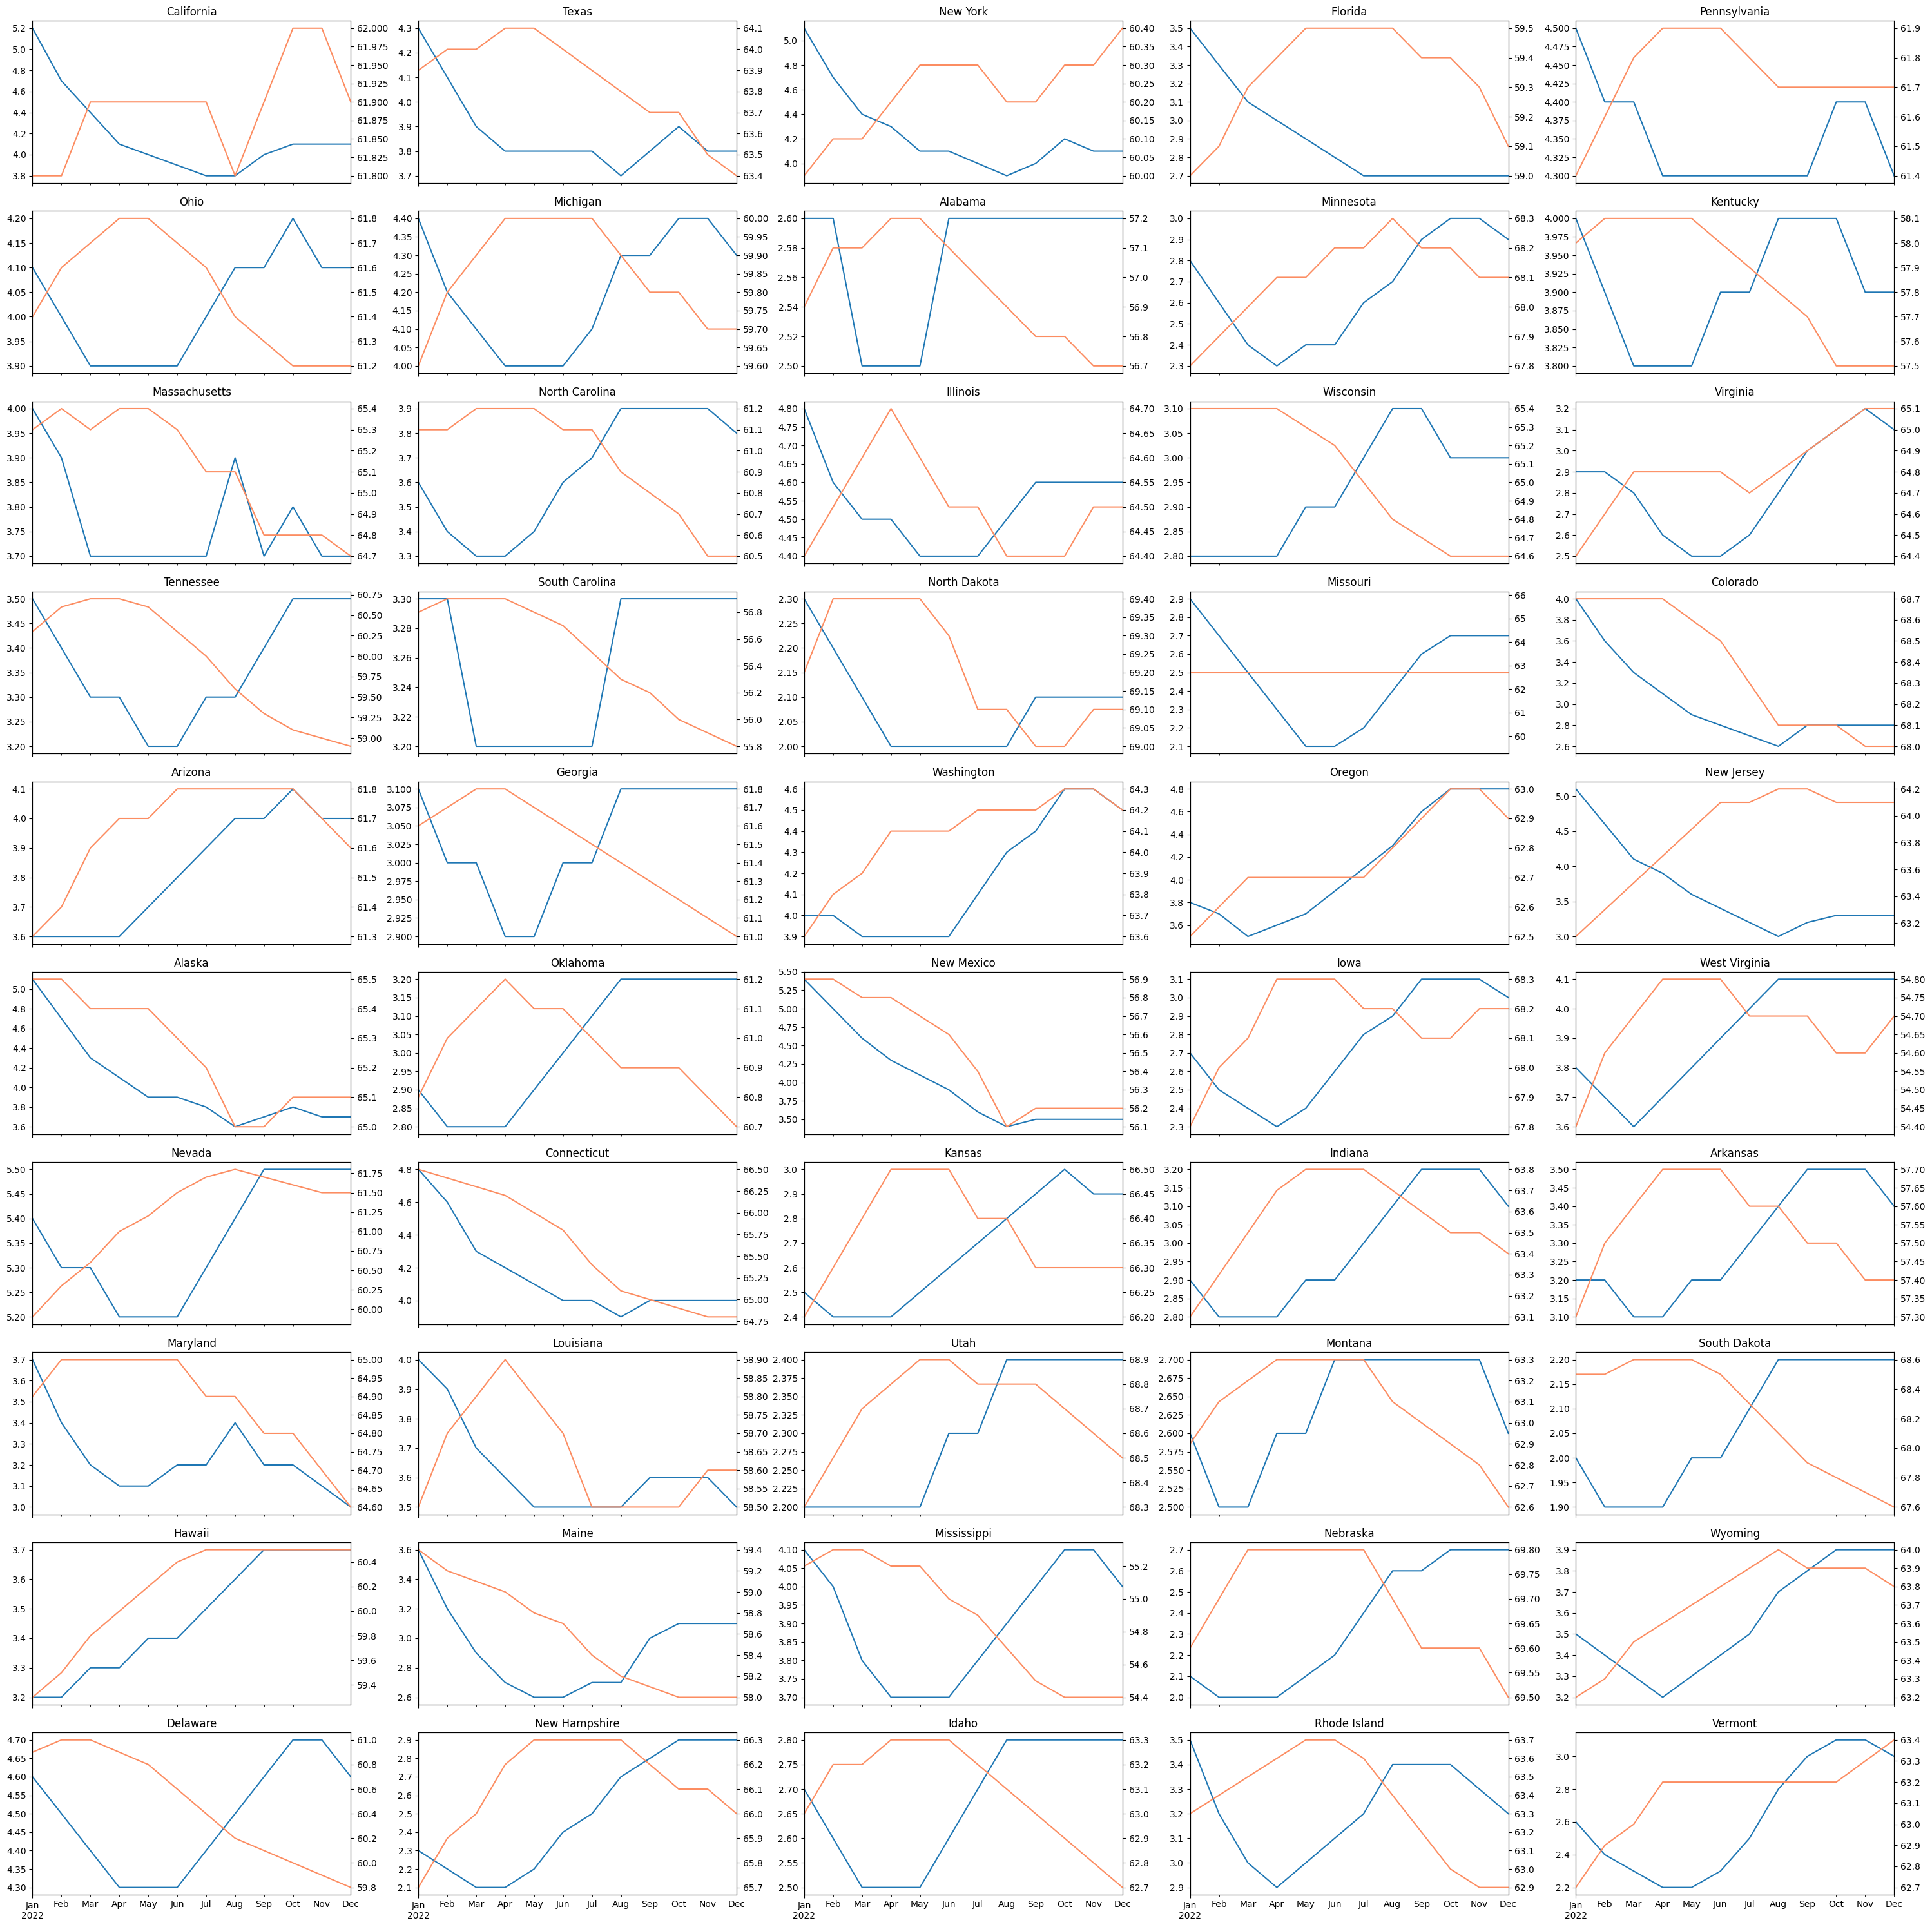

In [203]:
fig, axs = plt.subplots(10, 5, figsize=(30, 30), sharex=True)
axs = axs.flatten()

i = 0
for state in uemp_states.columns:
    if state in ["District Of Columbia","Puerto Rico"]:
        continue
    ax2 = axs[i].twinx()
    uemp_states.query('index >= 2022 and index < 2023') [state]\
        .plot(ax=axs[i], label='Unemployment')
    part_states.query('index >= 2022 and index < 2023')[state] \
        .plot(ax=ax2, label='Participation', color=color_pal[1])
    ax2.grid(False)
    axs[i].set_title(state)
    i += 1
plt.tight_layout()
plt.show()

Same chubnk just a solo look at the state and maybe can start to dig further into the data...   

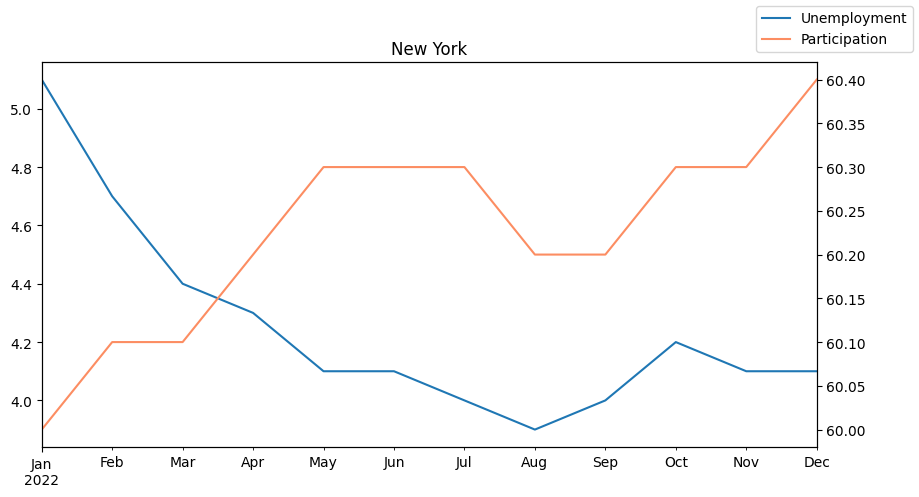

In [201]:
state = 'New York'
fig, ax = plt.subplots(figsize=(10, 5), sharex=True)
ax2 = ax.twinx()
uemp_states2 = uemp_states.asfreq('MS')
l1 = uemp_states2.query('index >= 2022 and index < 2023')[state] \
    .plot(ax=ax, label='Unemployment')
l2 = part_states.dropna().query('index >= 2022 and index < 2023')[state] \
    .plot(ax=ax2, label='Participation', color=color_pal[1])
ax2.grid(False)
ax.set_title(state)
fig.legend(labels=['Unemployment','Participation'])
plt.show()